<a href="https://colab.research.google.com/github/AdemilsonMiguel/AdemilsonMiguel/blob/main/Previsao_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
pip install pystan==2.19.1.1 prophet

In [ ]:
!pip install fbprophet

In [5]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = yf.download('MGLU3.SA', start = '2022-01-01', end = datetime.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,7.41,7.41,6.67,6.72,6.72,145442000
2022-01-04,6.78,6.94,6.45,6.61,6.61,94735500
2022-01-05,6.52,6.73,6.37,6.42,6.42,92667900
2022-01-06,6.46,6.53,6.13,6.25,6.25,96480700
2022-01-07,6.27,6.63,6.11,6.22,6.22,132688900
...,...,...,...,...,...,...
2022-11-09,4.63,4.67,4.40,4.47,4.47,121050900
2022-11-10,4.22,4.35,3.89,3.98,3.98,226321300
2022-11-11,4.11,4.15,3.38,3.46,3.46,389272300


In [8]:
df = pd.DataFrame()

In [9]:
df['y'] = data['Close']

In [10]:
df

,y
Date,
2022-01-03,6.72
2022-01-04,6.61
2022-01-05,6.42
2022-01-06,6.25
2022-01-07,6.22
...,...
2022-11-09,4.47
2022-11-10,3.98
2022-11-11,3.46


In [11]:
df['ds'] = data.index

In [12]:
df

,y,ds
Date,,
2022-01-03,6.72,2022-01-03
2022-01-04,6.61,2022-01-04
2022-01-05,6.42,2022-01-05
2022-01-06,6.25,2022-01-06
2022-01-07,6.22,2022-01-07
...,...,...
2022-11-09,4.47,2022-11-09
2022-11-10,3.98,2022-11-10
2022-11-11,3.46,2022-11-11


In [13]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [14]:
modelo = Prophet(daily_seasonality = True)

In [15]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


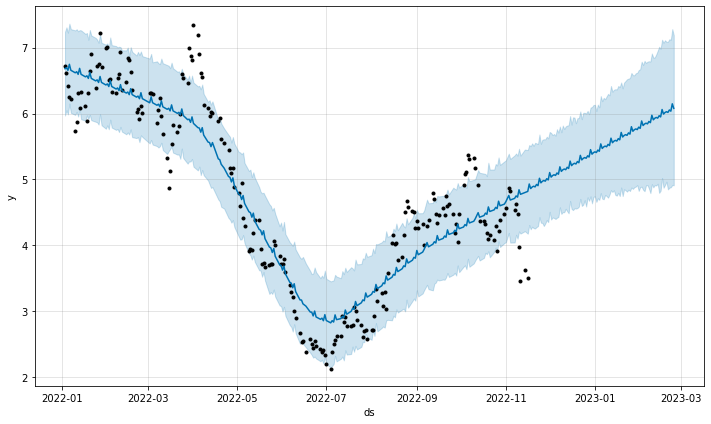

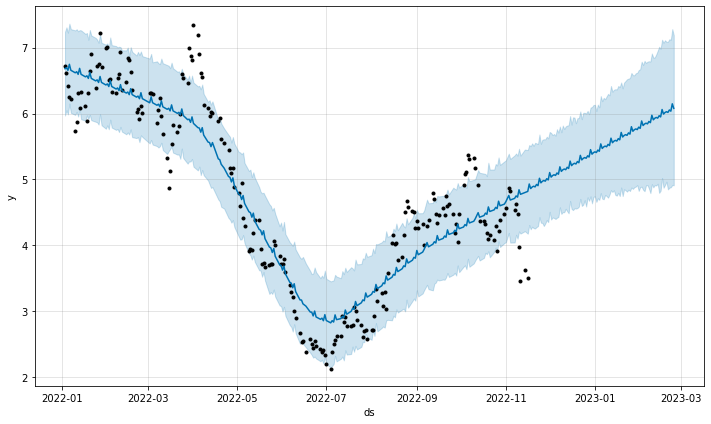

In [16]:
futuro = modelo.make_future_dataframe(periods = 100)
previsao = modelo.predict(futuro)
modelo.plot(previsao)

In [17]:
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
314,2023-02-20,6.031767,4.848846,7.089614,5.090153,6.932875,-0.014345,-0.014345,-0.014345,0.009857,0.009857,0.009857,-0.024202,-0.024202,-0.024202,0.0,0.0,0.0,6.017422
315,2023-02-21,6.044190,4.874627,7.128120,5.080951,6.959301,0.010310,0.010310,0.010310,0.009857,0.009857,0.009857,0.000453,0.000453,0.000453,0.0,0.0,0.0,6.054500
316,2023-02-22,6.056612,4.881583,7.119660,5.071594,6.984695,-0.020760,-0.020760,-0.020760,0.009857,0.009857,0.009857,-0.030617,-0.030617,-0.030617,0.0,0.0,0.0,6.035852
317,2023-02-23,6.069035,4.915036,7.281850,5.068122,7.010597,0.079117,0.079117,0.079117,0.009857,0.009857,0.009857,0.069260,0.069260,0.069260,0.0,0.0,0.0,6.148152
318,2023-02-24,6.081457,4.910955,7.191210,5.064312,7.035790,-0.002571,-0.002571,-0.002571,0.009857,0.009857,0.009857,-0.012428,-0.012428,-0.012428,0.0,0.0,0.0,6.078886


In [18]:
plot_plotly(modelo, previsao)